In [44]:
import pandas as pd
import numpy as np
import networkx as nx
import time
import scipy
import copy

In [1]:
import pandas as pd

In [8]:
rwr_rank = pd.read_csv('top1000genes_group4_withPPR.csv')['gene_list'].iloc[0:500]  
rwr_rank.to_csv('top500genes_final.csv',header=False,index=False)
ppr_rank = pd.read_csv('top1000genes_group4_withPPR.csv').iloc[:,4]

In [3]:
rwr_rank.head()

0       UBC
1       APP
2    PRKACB
3     HNF4A
4    PRKACA
Name: gene_list, dtype: object

In [4]:
ppr_rank.head()

0       UBC
1    PRKACA
2    PRKACB
3    PRKACG
4      GNB1
Name: ppr, dtype: object

In [5]:
def intersection(lst1, lst2):
    lst3 = [value for value in lst1 if value in lst2]
    return lst3

len(intersection(list(rwr_rank),list(ppr_rank)))/1000

0.474

In [ ]:
#TWAS

twas = pd.read_csv('TWAS.PGC.SCZ2.ALL.zscores', sep = ' ')
twas = twas[twas['Gene/intron'].str.contains("chr") == False]
twas = twas.iloc[0:157,:]
twas['Gene/intron'].to_csv('twas_genes.csv', index = False, header = False)
twas.head()

In [7]:
twas = pd.read_csv('twas_genes.csv',header=None).iloc[:,0]
twas.head()

0    C2orf47
1       BAG5
2    SDCCAG8
3    ANKRD44
4       PCCB
Name: 0, dtype: object

In [8]:
#CTD database

ctd = pd.read_csv('CTD_D012559_genes_20180607152155.csv').iloc[0:260,0]
ctd.head()

0     DRD2
1      PRL
2     BDNF
3    KCNH2
4     DRD2
Name: Gene Symbol, dtype: object

In [9]:
intersection(list(ctd),list(twas))

['CYP2D6', 'MAPK3', 'CYP2D6', 'CKB']

In [10]:
ctd_twas = list(set(list(ctd) + list(twas)))

In [11]:
len(intersection(list(rwr_rank),list(ctd_twas)))

86

In [13]:
len(intersection(list(rwr_rank),list(ctd)))

58

In [15]:
len(intersection(list(rwr_rank),list(twas)))

29

In [12]:
len(intersection(list(ppr_rank),list(ctd_twas)))

61

In [16]:
len(intersection(list(ppr_rank),list(ctd)))

60

In [17]:
len(intersection(list(ppr_rank),list(twas)))

2

In [18]:
import matplotlib.pyplot as plt

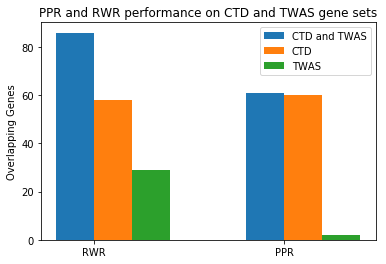

In [43]:
objects = ('RWR', 'PPR')
y_pos = np.arange(len(objects))
twas_performance = [29,2]
ctd_performance = [58,60]
ctd_twas_performance = [86,61]

fig, ax = plt.subplots()
bar_width = 0.2

ind = np.arange(len(objects)) 

rects1 = ax.bar(y_pos, ctd_twas_performance, bar_width, align='center', alpha=1, label = 'CTD and TWAS')
rects2 = ax.bar(y_pos+bar_width, ctd_performance, bar_width, align='center', alpha=1, label = 'CTD')
rects3 = ax.bar(y_pos+2*bar_width, twas_performance, bar_width, align='center', alpha=1, label = 'TWAS')
plt.ylabel('Overlapping Genes')
plt.title('PPR and RWR performance on CTD and TWAS gene sets')
plt.legend()

ax.set_xticks(ind + bar_width / 2)
ax.set_xticklabels(('RWR', 'PPR'))
 
plt.show()

In [45]:
from ndex.networkn import NdexGraph
import pickle
import operator

def save_object(obj, filename):
    with open(filename, 'wb') as output:  # Overwrites any existing file.
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

In [46]:
with open('G.pkl', 'rb') as input:
    G = pickle.load(input)

In [47]:
#Export subgraphs to GraphML for visualization

G_ctd = G.subgraph(list(ctd))
len(G_ctd)

222

In [48]:
G_twas = G.subgraph(list(twas))
len(G_twas)

121

In [50]:
G_twas_ctd = G.subgraph(list(ctd_twas))
len(G_twas_ctd)

340

In [52]:
import matplotlib as plt

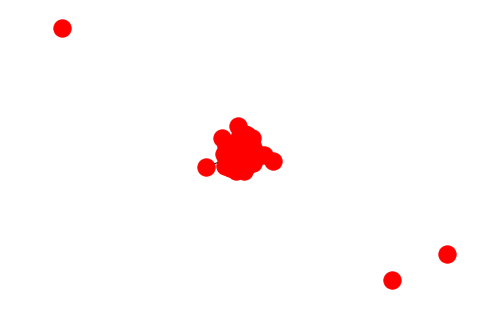

In [56]:
nx.draw_spring(G_ctd)

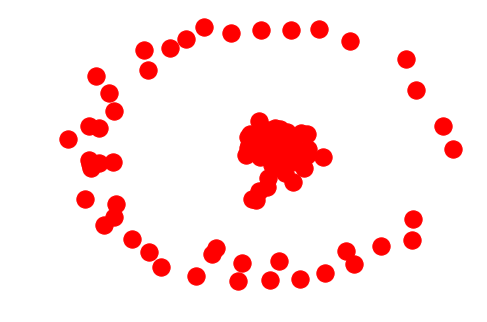

In [57]:
nx.draw(G_twas)

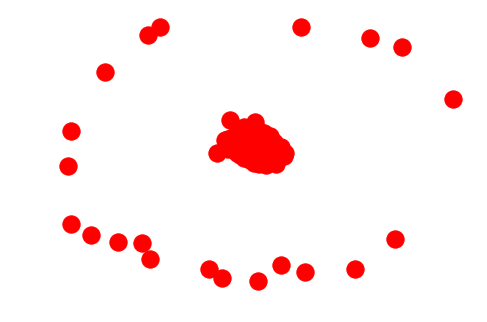

In [58]:
nx.draw(G_twas_ctd)